# 7FNCE025W High Frequency Trading Assignment 1

by Ridwan Harir

In [2]:
# Importing all the necessary libraries

import pandas as pd # for data analystics libraries
import numpy as np # for number manipulation
import matplotlib.pyplot as plt # for plotting and visualisations
import statistics as stats # for statistcial analysis
from mat4py import loadmat # for retrieving and accessing the .mat files
import scipy.io as io # same as above and better
import seaborn as sns # for data visualisation
from sklearn.linear_model import LinearRegression # helpful for regression analysis

C:\Users\R24\AppData\Local\Temp\ipykernel_11304\3499325685.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # for data analystics libraries


### Loading the Data

In [22]:
# Importing the data from the MAT

df = io.loadmat('FB_20141126.mat')
df2 = io.loadmat('FTSE_sample')

# Extracting data from the Log Order Book
LOB = df['LOB']

In [4]:
LOB_shape = df['LOB'].shape # finding the shape of the array


for header in LOB.dtype.names: # This loop will retrieve the headers and the data in the arrays
    print(header)
    print(LOB[header])

NumberMO
[[array([[0, 0],
         [1, 0],
         [1, 0],
         ...,
         [0, 0],
         [0, 3],
         [0, 3]], dtype=uint8)]]
VolumeMO
[[array([[   0,    0],
         [ 105,    0],
         [ 100,    0],
         ...,
         [   0,    0],
         [   0, 9923],
         [   0, 3837]])]]
EventTime
[[array([[34200100],
         [34200200],
         [34200300],
         ...,
         [57599800],
         [57599900],
         [57600000]])]]
BuyPrice
[[array([[754700, 754500, 754400, ..., 750400, 750300, 750200],
         [754700, 753800, 753500, ..., 740100, 740000, 738800],
         [755000, 754700, 753800, ..., 742800, 740100, 740000],
         ...,
         [776300, 776200, 776100, ..., 774600, 774500, 774300],
         [776300, 776200, 776100, ..., 774600, 774500, 774300],
         [776300, 776200, 776100, ..., 774600, 774500, 774300]])]]
SellPrice
[[array([[755000, 755100, 755300, ..., 758600, 759100, 759500],
         [755000, 755100, 755300, ..., 759800, 759900, 760

In [5]:
# the data is a nested array and the change of the tick is 1 miliseconds

tick = ((LOB['EventTime'][0][0][:,0])-3600000*9.5)*1e-3 
bid = ((LOB['BuyPrice'][0][0][:,0])*1e-4)
bidvol = (LOB['BuyVolume'][0][0][:,0]*1.0)
ask = (LOB['SellPrice'][0][0][:,0]*1e-4)
askvol = (LOB['SellVolume'][0][0][:,0]*1.0)
M0 = LOB['MO'][0][0]*1.0

# accounting for delta time

dt = tick[1] - tick[0]

# type the variable below to see the arrays or the delta time
dt



0.1

### Calculating the MidPrice, Spread, Volume Imbalance and MicroPrice

In [6]:
midprice = (bid + ask) / 2
microprice = (bid * askvol + ask * bidvol) / (bidvol + askvol)
spread = ask - bid

In [7]:
midprice_mean = midprice.mean().round(4)
microprice_mean = microprice.mean().round(4)
avg_spread = (ask.max() - bid.min()).round(4)

print(f'mid-price: {midprice_mean}')
print(f'micro-price: {microprice_mean}')
print(f'Spread: {spread}')

mid-price: 77.2374
micro-price: 77.2372
Spread: [0.03 0.03 0.01 ... 0.01 0.01 0.01]


In [8]:
df1 = {
    'Bid': bid,
    'Ask': ask,
    'Bid Volume': bidvol,
    'Ask Volume': askvol,
    'Midprice': midprice,
    'Microprice': microprice,
    'Spread': spread
}

df1 = pd.DataFrame(df1)
df1

,Bid,Ask,Bid Volume,Ask Volume,Midprice,Microprice,Spread
0,75.47,75.50,1600.0,105.0,75.485,75.498152,0.03
1,75.47,75.50,1600.0,105.0,75.485,75.498152,0.03
2,75.50,75.51,500.0,100.0,75.505,75.508333,0.01
3,75.51,75.53,100.0,1000.0,75.520,75.511818,0.02
4,75.51,75.53,100.0,1000.0,75.520,75.511818,0.02
...,...,...,...,...,...,...,...
233995,77.63,77.64,5148.0,9800.0,77.635,77.633444,0.01
233996,77.63,77.64,5148.0,9800.0,77.635,77.633444,0.01
233997,77.63,77.64,5148.0,12600.0,77.635,77.632901,0.01
233998,77.63,77.64,5148.0,12600.0,77.635,77.632901,0.01


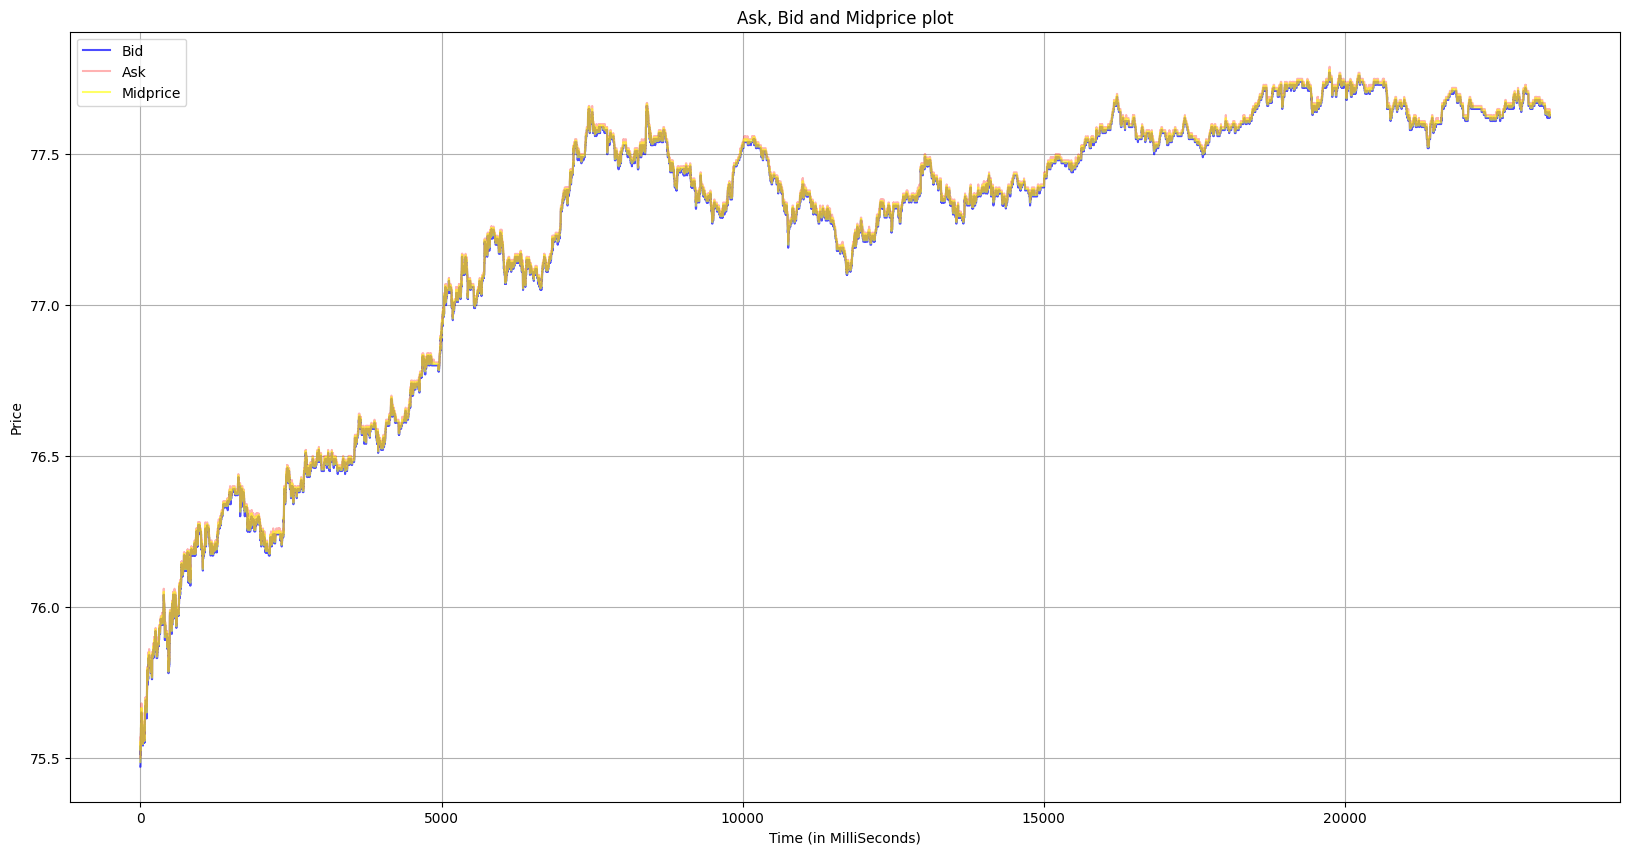

In [9]:
plt.figure(figsize=(20,10))
plt.title('Ask, Bid and Midprice plot')
plt.plot(tick,df1['Bid'],color = 'blue', alpha=0.7, label= 'Bid')
plt.plot(tick, df1['Ask'], color = 'red', alpha=0.3, label= 'Ask')
plt.plot(tick, df1['Midprice'], color = 'yellow', alpha=0.6,  label= 'Midprice')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Time (in MilliSeconds)')
plt.grid()
plt.show()

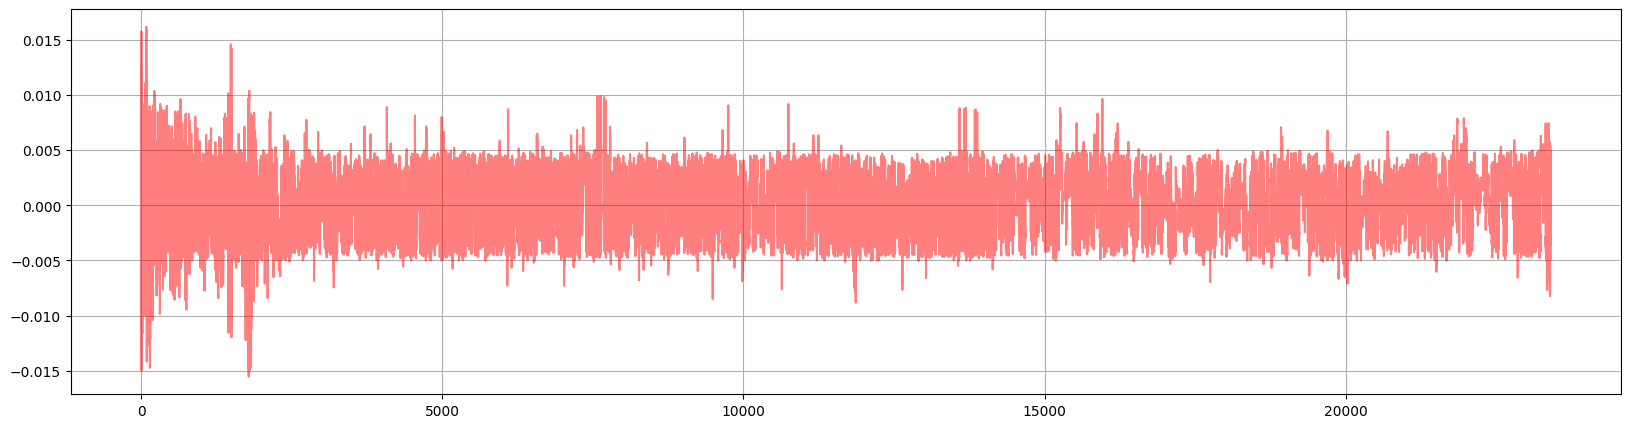

In [10]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(tick, midprice - microprice, color='red', alpha = 0.5)

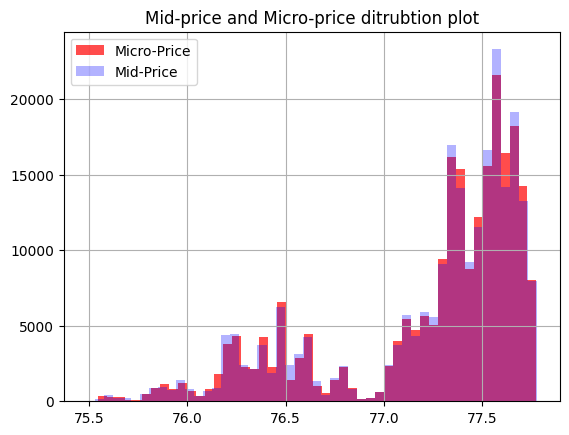

In [11]:
plt.hist(microprice, bins = 50, color='red', alpha = 0.7,label='Micro-Price')
plt.hist(midprice, bins = 50, color='blue', alpha = 0.3,label='Mid-Price')
plt.grid()
plt.title('Mid-price and Micro-price ditrubtion plot')
plt.legend()

Text(0, 0.5, 'Spread')

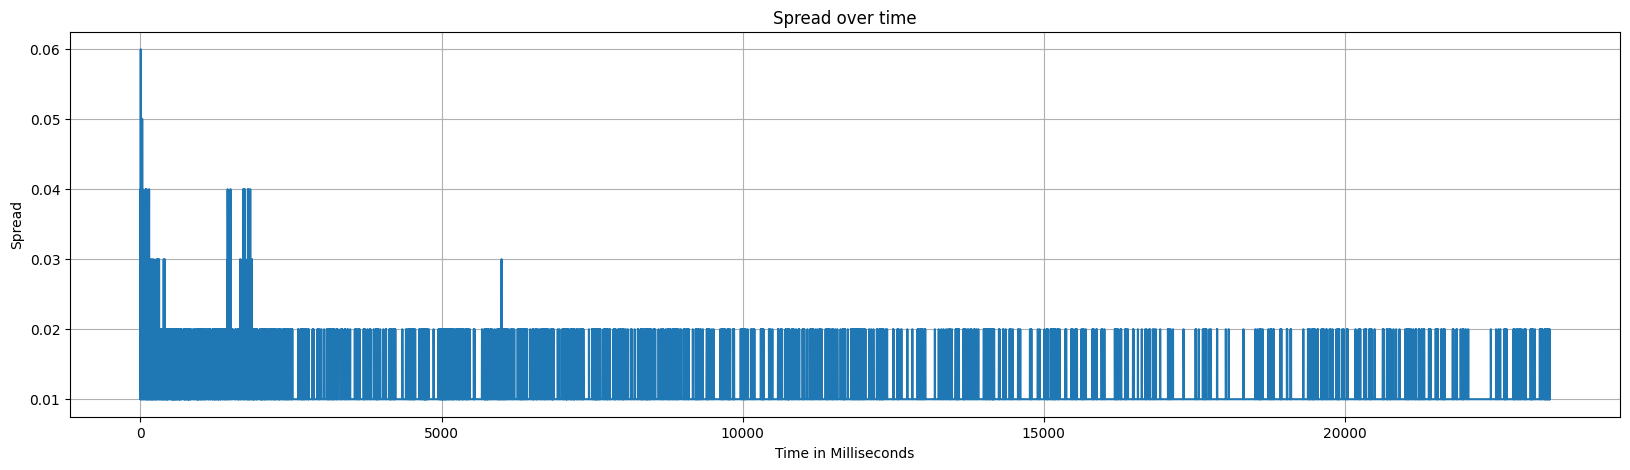

In [12]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(tick, spread)
plt.title('Spread over time')
plt.xlabel('Time in Milliseconds')
plt.ylabel('Spread')

Text(0, 0.5, 'Frequency')

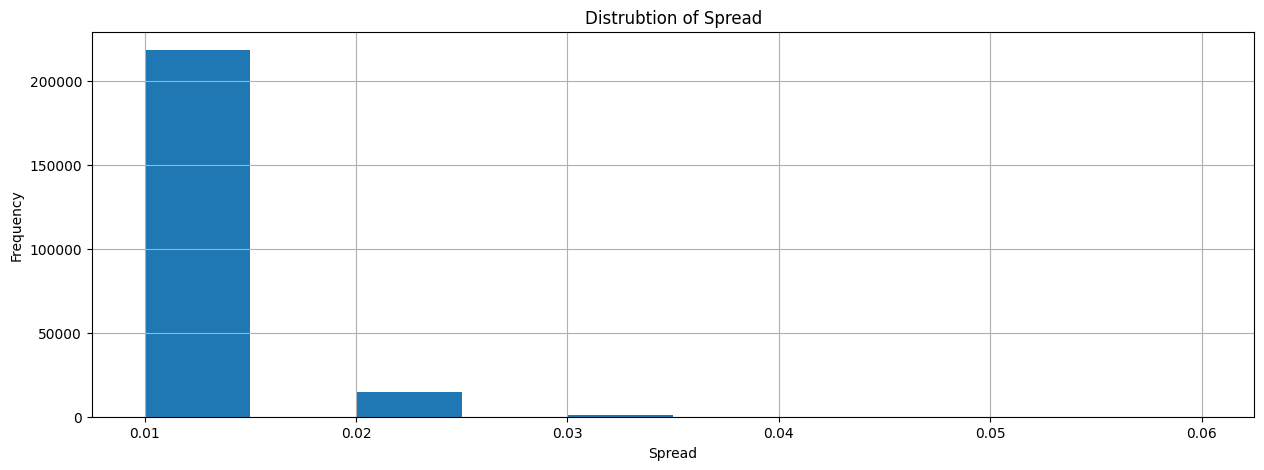

In [13]:
plt.figure(figsize=(15,5))
plt.hist(spread,bins=10)
plt.grid()
plt.title('Distrubtion of Spread')
plt.xlabel('Spread')
plt.ylabel('Frequency')

#### Volume Imbalance 

In [14]:
volume_imbalance = (bidvol - askvol) / (bidvol + askvol)

# Convert volume imbalance to a column vector (transpose) and store it in the variable rho
rho = np.array(volume_imbalance, ndmin=2).T

rho

array([[ 0.87683284],
       [ 0.87683284],
       [ 0.66666667],
       ...,
       [-0.4198783 ],
       [-0.4198783 ],
       [-0.73959732]])

(0.0, 24569.995)

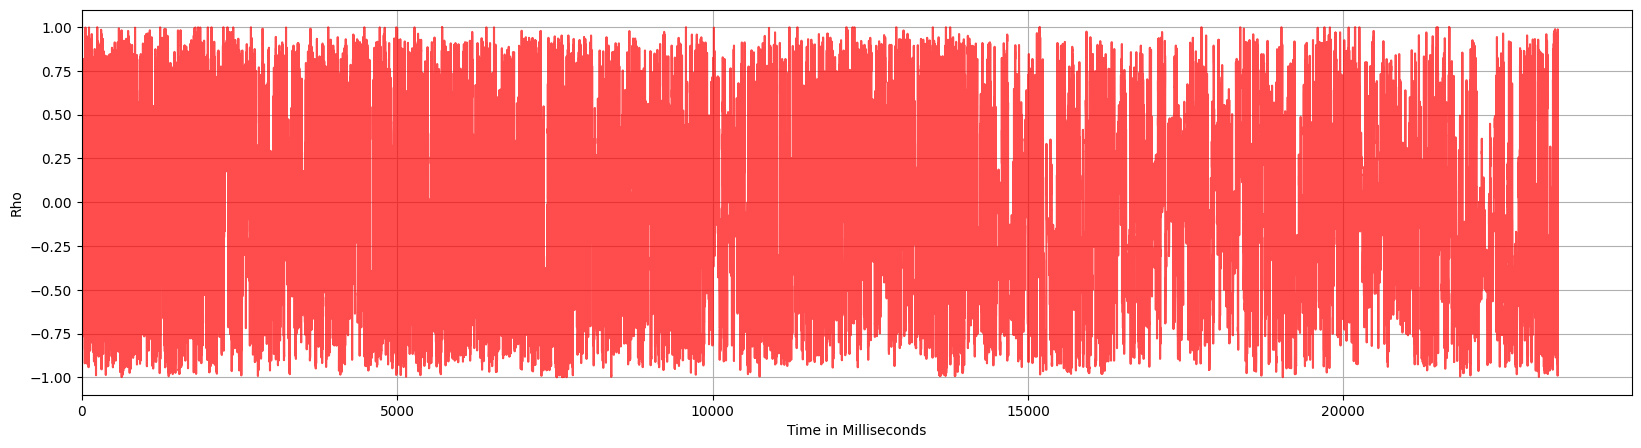

In [15]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(tick, rho, label = 'rho', alpha= 0.7, color='red')
plt.xlabel('Time in Milliseconds')
plt.ylabel('Rho')
plt.xlim(0)

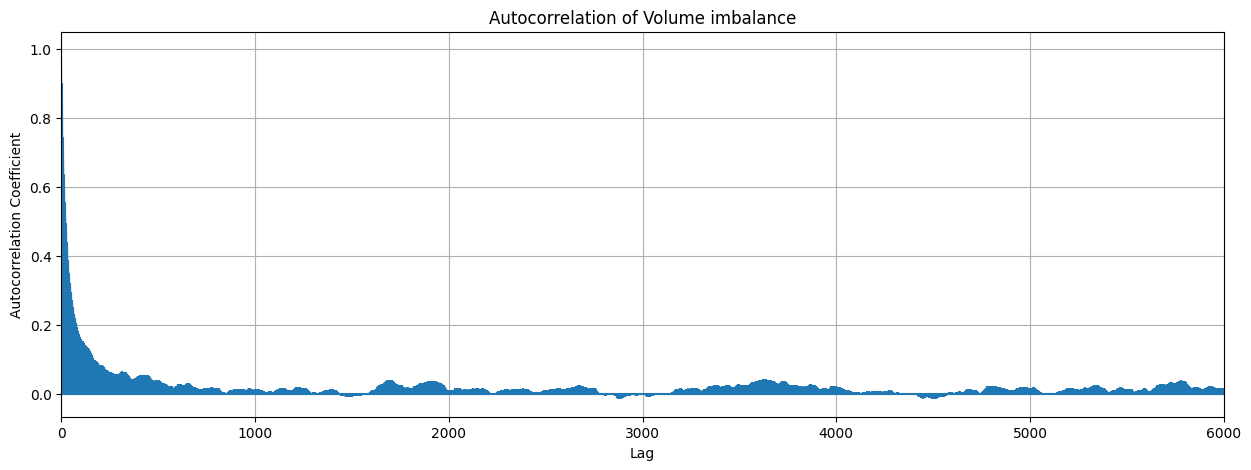

In [16]:
plt.figure(figsize=(15, 5))
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation Coefficient')
plt.title('Autocorrelation of Volume imbalance')
plt.xlim([0,6000])
plt.grid()
plt.show()

Text(0, 0.5, 'Freq')

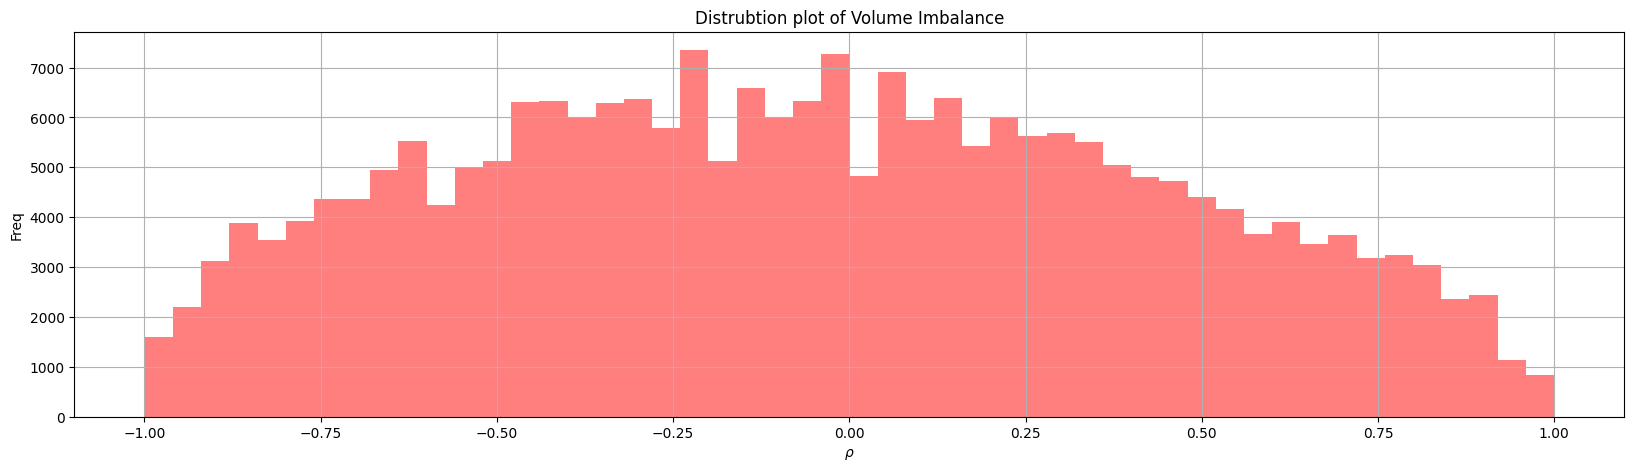

In [17]:
plt.figure(figsize=(20,5))
plt.hist(rho, bins=50, color='red', alpha = 0.5)
plt.title('Distrubtion plot of Volume Imbalance')
plt.grid()
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')

#### Volume Imbalance for Market Orders 

In [18]:
MO = pd.DataFrame(M0)


In [19]:
rho_MO = (MO[3] - MO[4]) / (MO[3] + MO[4])

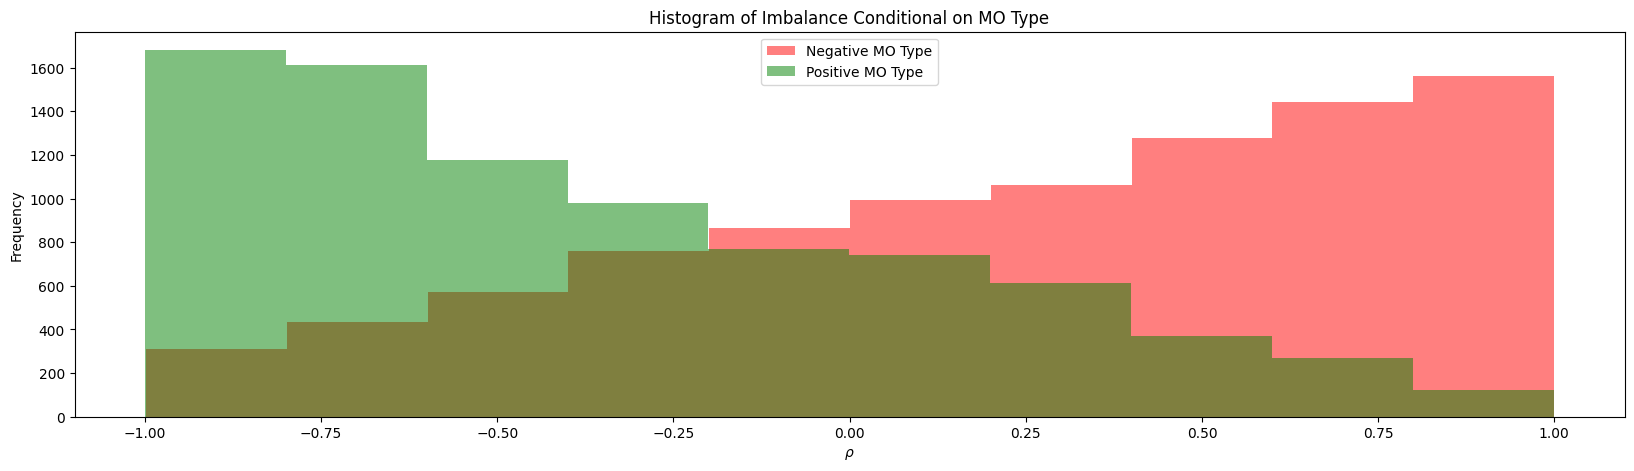

In [20]:
rho_MO_negative = rho_MO[MO.iloc[:, 7] == -1] # 
rho_MO_positive = rho_MO[MO.iloc[:, 7] == 1]

plt.figure(figsize=(20,5))
plt.hist(rho_MO_negative, bins=10, alpha=0.5,color='red', label='Negative MO Type')
plt.hist(rho_MO_positive, bins=10, alpha=0.5,color = 'green', label='Positive MO Type')

plt.title("Histogram of Imbalance Conditional on MO Type")
plt.xlabel(r'$\rho$')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Q2: FTSE_sample Analysis

#### Creating a new dataframe with the new data

In [24]:
df2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Oct 15 23:13:24 2023',
 '__version__': '1.0',
 '__globals__': [],
 'Bestask': array([[149.35],
        [149.35],
        [149.5 ],
        ...,
        [126.  ],
        [125.95],
        [126.8 ]]),
 'Bestbid': array([[149.1 ],
        [149.  ],
        [149.25],
        ...,
        [125.9 ],
        [125.9 ],
        [126.7 ]]),
 'MO': array([[ 0.    ],
        [ 4.1283],
        [-2.8656],
        ...,
        [20.969 ],
        [27.293 ],
        [31.9993]])}

In [27]:
Best_Ask =df2['Bestask']
Best_Bid = df2['Bestbid']
MO1 = df2['MO']

In [30]:
df2 = {
    'Best Ask': Best_Ask.flatten(),
    'Best Bid': Best_Bid.flatten(),
    'MO': MO1.flatten()
}

df2 = pd.DataFrame(df2)

In [31]:
df2

,Best Ask,Best Bid,MO
0,149.35,149.10,0.0000
1,149.35,149.00,4.1283
2,149.50,149.25,-2.8656
3,149.95,149.85,5.4553
4,149.90,149.60,122.4072
...,...,...,...
62215,125.85,125.75,-43.7396
62216,125.95,125.85,2.1216
62217,126.00,125.90,20.9690
62218,125.95,125.90,27.2930


#### Mid-Price and Minutely Returns

In [32]:
df2['Mid-Price'] = (df2['Best Ask'] + df2['Best Bid']) / 2 # Mid Price for the dataset

df2['Minutely Returns'] = (df2['Mid-Price'].pct_change() * 100).fillna(0)  # Minutely Returns calculations

summary_stats = df2['Minutely Returns'].describe() 

print(f'Summary stats for minutely: ')
print(df2)
print(summary_stats)

Summary stats for minutely: 
       Best Ask  Best Bid        MO  Mid-Price  Minutely Returns
0        149.35    149.10    0.0000    149.225          0.000000
1        149.35    149.00    4.1283    149.175         -0.033506
2        149.50    149.25   -2.8656    149.375          0.134071
3        149.95    149.85    5.4553    149.900          0.351464
4        149.90    149.60  122.4072    149.750         -0.100067
...         ...       ...       ...        ...               ...
62215    125.85    125.75  -43.7396    125.800         -0.178536
62216    125.95    125.85    2.1216    125.900          0.079491
62217    126.00    125.90   20.9690    125.950          0.039714
62218    125.95    125.90   27.2930    125.925         -0.019849
62219    126.80    126.70   31.9993    126.750          0.655152

[62220 rows x 5 columns]
count    62220.000000
mean        -0.000095
std          0.182502
min         -7.428571
25%         -0.058754
50%          0.000000
75%          0.058052
max        

#### Autocorrelation of Order Flows:

In [33]:
order_flow = df2['MO']

In [34]:
autocorr_values = []
lags = range(21) 
for lag in lags:
    autocorr_values.append(order_flow.autocorr(lag))

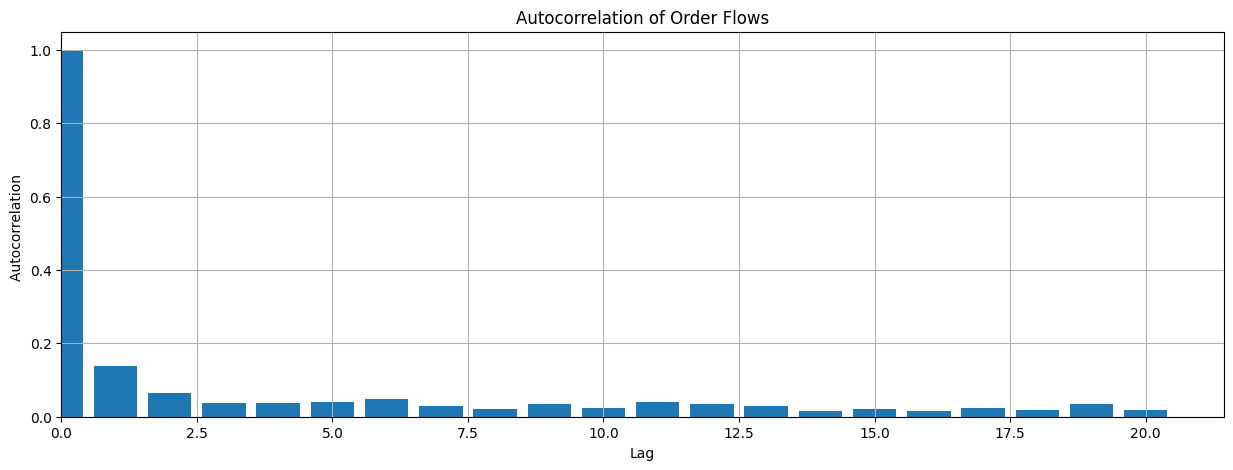

In [35]:
plt.figure(figsize=(15, 5))
plt.bar(lags, autocorr_values) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation ')
plt.title('Autocorrelation of Order Flows')
plt.xlim(0)
plt.grid()
plt.show()

#### Regression Analysis on Minuetly return

In [36]:
df2['Previous Minute Return'] = df2['Minutely Returns'].shift(1).fillna(0) # previous minute return added  to df

In [37]:
df2 = df2.dropna(subset=['Previous Minute Return', 'MO', 'Minutely Returns'])

In [38]:
df2['Previous Minute Return'].value_counts()

Previous Minute Return
 0.000000e+00    9655
 2.220446e-14     133
-2.220446e-14      82
-1.110223e-14      61
 1.786671e-02      24
                 ... 
-2.073398e-02       1
 2.494284e-01       1
-2.281211e-01       1
 1.869936e-01       1
-1.785360e-01       1
Name: count, Length: 31566, dtype: int64

In [39]:
X = df2[['Previous Minute Return', 'MO']]
y = df2['Minutely Returns']


model = LinearRegression()

model.fit(X, y)


print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [-0.03930952  0.00242319]
Intercept: 0.00027179832054255015


#### Trading Strategy Development

Calculate the cumulative order flows for the previous 30 minutes.

In [40]:
df2['Cumulative_Order_Flows'] = df2['MO'].rolling(window=30).sum()  

Trading strategy

In [41]:
df2['Trading_Strategy'] = pd.cut(df2['Cumulative_Order_Flows'], bins=[-float('inf'), 0, float('inf')], labels=[-1, 1])
df2['Trading_Strategy'] = pd.to_numeric(df2['Trading_Strategy'], errors='coerce').fillna(0)
df2['Strategy_Return'] = df2['Trading_Strategy'] * df2['Minutely Returns']
cumulative_return = df2['Strategy_Return'].cumsum()
print("Cumulative Return of the Trading Strategy:")
print(cumulative_return)



Cumulative Return of the Trading Strategy:
0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
            ...    
62215    328.911250
62216    328.831759
62217    328.792045
62218    328.811894
62219    328.156742
Name: Strategy_Return, Length: 62220, dtype: float64


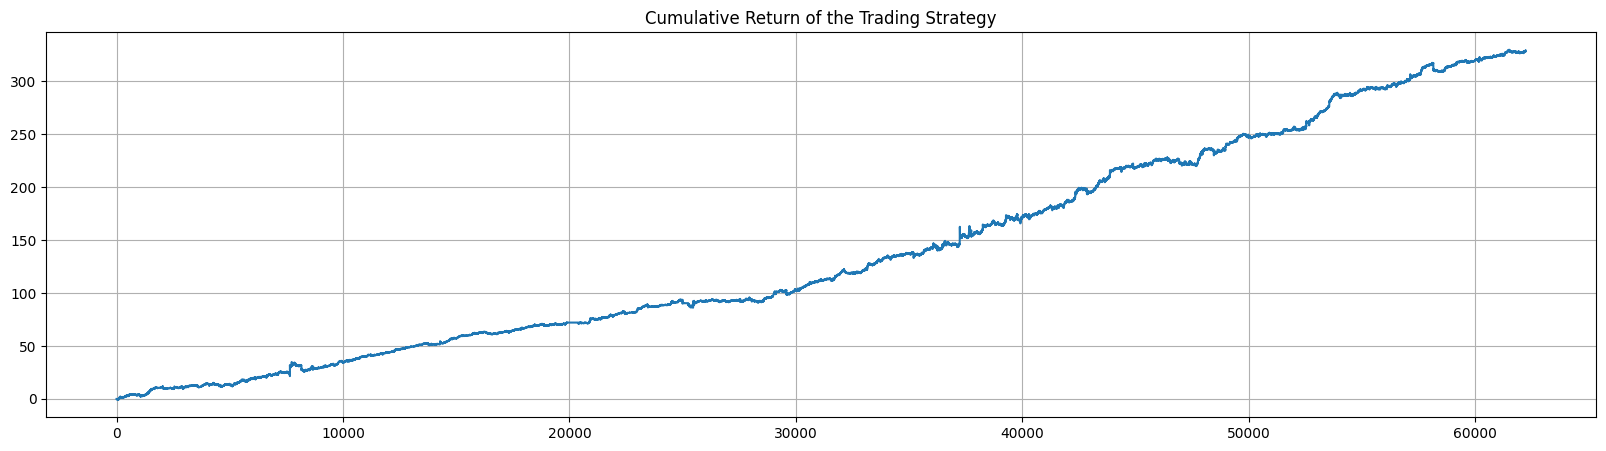

In [42]:
plt.figure(figsize=(20,5))
plt.plot(cumulative_return)
plt.title('Cumulative Return of the Trading Strategy')
plt.grid()

Comparing stock returns 

In [46]:
df2['Stock_Cumulative_Return'] = df2['Minutely Returns'].cumsum()

cumulative_return_strategy = df2['Strategy_Return'].cumsum()

print("Cumulative Return of the Stock during the Whole Period:")
print(df2['Stock_Cumulative_Return'].iloc[-1])  # Print the last value

print("\nCumulative Return of the Trading Strategy:")
print(cumulative_return_strategy.iloc[-1])  # Print the last value



Cumulative Return of the Stock during the Whole Period:
-5.938215643075335

Cumulative Return of the Trading Strategy:
328.156741823321


In [ ]:
Q2: FTSE_sample Analysis
Creating a new dataframe with the new data

df2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Oct 15 23:13:24 2023',
 '__version__': '1.0',
 '__globals__': [],
 'Bestask': array([[149.35],
        [149.35],
        [149.5 ],
        ...,
        [126.  ],
        [125.95],
        [126.8 ]]),
 'Bestbid': array([[149.1 ],
        [149.  ],
        [149.25],
        ...,
        [125.9 ],
        [125.9 ],
        [126.7 ]]),
 'MO': array([[ 0.    ],
        [ 4.1283],
        [-2.8656],
        ...,
        [20.969 ],
        [27.293 ],
        [31.9993]])}

Best_Ask =df2['Bestask']

Best_Bid = df2['Bestbid']

MO1 = df2['MO']

df2 = {

    'Best Ask': Best_Ask.flatten(),

    'Best Bid': Best_Bid.flatten(),

    'MO': MO1.flatten()

}

​

df2 = pd.DataFrame(df2)

df2

	Best Ask 	Best Bid 	MO
0 	149.35 	149.10 	0.0000
1 	149.35 	149.00 	4.1283
2 	149.50 	149.25 	-2.8656
3 	149.95 	149.85 	5.4553
4 	149.90 	149.60 	122.4072
... 	... 	... 	...
62215 	125.85 	125.75 	-43.7396
62216 	125.95 	125.85 	2.1216
62217 	126.00 	125.90 	20.9690
62218 	125.95 	125.90 	27.2930
62219 	126.80 	126.70 	31.9993

62220 rows × 3 columns
Mid-Price and Minutely Returns

df2['Mid-Price'] = (df2['Best Ask'] + df2['Best Bid']) / 2 # Mid Price for the dataset

​

df2['Minutely Returns'] = (df2['Mid-Price'].pct_change() * 100).fillna(0)  # Minutely Returns calculations

​

summary_stats = df2['Minutely Returns'].describe() 

​

print(f'Summary stats for minutely: ')

print(df2)

print(summary_stats)

Summary stats for minutely: 
       Best Ask  Best Bid        MO  Mid-Price  Minutely Returns
0        149.35    149.10    0.0000    149.225          0.000000
1        149.35    149.00    4.1283    149.175         -0.033506
2        149.50    149.25   -2.8656    149.375          0.134071
3        149.95    149.85    5.4553    149.900          0.351464
4        149.90    149.60  122.4072    149.750         -0.100067
...         ...       ...       ...        ...               ...
62215    125.85    125.75  -43.7396    125.800         -0.178536
62216    125.95    125.85    2.1216    125.900          0.079491
62217    126.00    125.90   20.9690    125.950          0.039714
62218    125.95    125.90   27.2930    125.925         -0.019849
62219    126.80    126.70   31.9993    126.750          0.655152

[62220 rows x 5 columns]
count    62220.000000
mean        -0.000095
std          0.182502
min         -7.428571
25%         -0.058754
50%          0.000000
75%          0.058052
max          5.734521
Name: Minutely Returns, dtype: float64

Autocorrelation of Order Flows:

order_flow = df2['MO']

autocorr_values = []

lags = range(21) 

for lag in lags:

    autocorr_values.append(order_flow.autocorr(lag))

plt.figure(figsize=(15, 5))

plt.bar(lags, autocorr_values) 

plt.xlabel('Lag')

plt.ylabel('Autocorrelation ')

plt.title('Autocorrelation of Order Flows')

plt.xlim(0)

plt.grid()

plt.show()

Regression Analysis on Minuetly return

df2['Previous Minute Return'] = df2['Minutely Returns'].shift(1).fillna(0) # previous minute return added  to df

df2 = df2.dropna(subset=['Previous Minute Return', 'MO', 'Minutely Returns'])

df2['Previous Minute Return'].value_counts()

Previous Minute Return
 0.000000e+00    9655
 2.220446e-14     133
-2.220446e-14      82
-1.110223e-14      61
 1.786671e-02      24
                 ... 
-2.073398e-02       1
 2.494284e-01       1
-2.281211e-01       1
 1.869936e-01       1
-1.785360e-01       1
Name: count, Length: 31566, dtype: int64

X = df2[['Previous Minute Return', 'MO']]

y = df2['Minutely Returns']

​

​

model = LinearRegression()

​

model.fit(X, y)

​

​

print(f'Coefficients: {model.coef_}')

print(f'Intercept: {model.intercept_}')

Coefficients: [-0.03930952  0.00242319]
Intercept: 0.00027179832054255015

Trading Strategy Development

Calculate the cumulative order flows for the previous 30 minutes.

df2['Cumulative_Order_Flows'] = df2['MO'].rolling(window=30).sum()  

Trading strategy

df2['Trading_Strategy'] = pd.cut(df2['Cumulative_Order_Flows'], bins=[-float('inf'), 0, float('inf')], labels=[-1, 1])

df2['Trading_Strategy'] = pd.to_numeric(df2['Trading_Strategy'], errors='coerce').fillna(0)

df2['Strategy_Return'] = df2['Trading_Strategy'] * df2['Minutely Returns']

cumulative_return = df2['Strategy_Return'].cumsum()

print("Cumulative Return of the Trading Strategy:")

print(cumulative_return)

​

​

Cumulative Return of the Trading Strategy:
0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
            ...    
62215    328.911250
62216    328.831759
62217    328.792045
62218    328.811894
62219    328.156742
Name: Strategy_Return, Length: 62220, dtype: float64

plt.figure(figsize=(20,5))

plt.plot(cumulative_return)

plt.title('Cumulative Return of the Trading Strategy')

plt.grid()

Comparing stock returns

df2['Stock_Cumulative_Return'] = df2['Minutely Returns'].cumsum()

​

cumulative_return_strategy = df2['Strategy_Return'].cumsum()

​

print("Cumulative Return of the Stock during the Whole Period:")

print(df2['Stock_Cumulative_Return'].iloc[-1])  # Print the last value

​

print("\nCumulative Return of the Trading Strategy:")

print(cumulative_return_strategy.iloc[-1])  # Print the last value

​

​

Cumulative Return of the Stock during the Whole Period:
-5.938215643075335

Cumulative Return of the Trading Strategy:
328.156741823321
